In [4]:
# Import Library that we need to do this project

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [5]:
df = pd.read_csv("/content/Data_Wisata_Bali.csv")
df

,Wilayah,Panorama,Tipe Rekreasi,Target Prediksi (y)
0,Kab. Jembrana,Pantai,water sports,Medewi Beach
1,Kab. Badung,Pantai,Spot Foto,Tegal Wangi Beach
2,Kab. Karangasem,Pantai,water sports,Pantai Bias Tugel
3,Kab. Badung,Pantai,water sports,Pantai Geger
4,Kab. Badung,Pantai,berenang,Pantai Karma Kandara
5,Kab. Gianyar,Gunung,Spot Foto,Ubud Monkey Forest
6,Kab. Gianyar,Gunung,trekking,Ubud Monkey Forest
7,Kab. Karangasem,Gunung,Spot Foto,Savana Tianyar
8,Kab. Karangasem,Gunung,Spot Foto,Bukit Cinta Viewpoint
9,Kab. Karangasem,Gunung,Spot Foto,Lahangan Sweet


In [17]:
print(np.unique(df["Wilayah"]))
wilayah=np.unique(df["Wilayah"])

['Kab. Badung' 'Kab. Bangli' 'Kab. Buleleng' 'Kab. Gianyar'
 'Kab. Jembrana' 'Kab. Karangasem' 'Kab. Klungkung' 'Kab. Tabanan'
 'Kota Denpasar']


In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
wilayahEncoder = label_encoder.fit_transform(wilayah)
print(wilayahEncoder)

[0 1 2 3 4 5 6 7 8]


In [19]:
df_le = pd.DataFrame()
df_le["Wilayah_Encoded"] = label_encoder.fit_transform(df["Wilayah"])
df_le["Panorama_Encoded"] = label_encoder.fit_transform(df["Panorama"])
df_le["Tipe Rekreasi_Encoded"] = label_encoder.fit_transform(df["Tipe Rekreasi"])
df_le["Target Prediksi_Encoded"] = label_encoder.fit_transform(df["Target Prediksi (y)"])
df_le

,Wilayah_Encoded,Panorama_Encoded,Tipe Rekreasi_Encoded,Target Prediksi_Encoded
0,4,1,10,23
1,0,1,2,48
2,5,1,10,29
3,0,1,10,33
4,0,1,3,35
5,3,0,2,55
6,3,0,8,55
7,5,0,2,45
8,5,0,2,9
9,5,0,2,19


In [20]:
X = df_le.drop("Target Prediksi_Encoded", axis=1)
y =  df_le["Target Prediksi_Encoded"]

In [21]:
X

,Wilayah_Encoded,Panorama_Encoded,Tipe Rekreasi_Encoded
0,4,1,10
1,0,1,2
2,5,1,10
3,0,1,10
4,0,1,3
5,3,0,2
6,3,0,8
7,5,0,2
8,5,0,2
9,5,0,2


In [22]:
y.nunique()

56

In [23]:
X.shape[1]

3

In [24]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(y.unique().shape[0], activation='softmax'))

lr = 0.015  # Learning rate yang diinginkan

optimizer = SGD(learning_rate=lr)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               512       
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 56)                952       
                                                                 
Total params: 12,328
Trainable params: 12,328
Non-trainable params: 0
_________________________________________________________________


In [25]:
history_model = model.fit(X, y, batch_size=7, epochs=1000)

Epoch 1/1000
9/9 [==============================] - 1s 3ms/step - loss: 4.0685 - accuracy: 0.0175
Epoch 2/1000
9/9 [==============================] - 0s 3ms/step - loss: 4.0466 - accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 2ms/step - loss: 4.0329 - accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 3ms/step - loss: 4.0199 - accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 3ms/step - loss: 4.0096 - accuracy: 0.0175
Epoch 6/1000
9/9 [==============================] - 0s 3ms/step - loss: 4.0022 - accuracy: 0.0175
Epoch 7/1000
9/9 [==============================] - 0s 3ms/step - loss: 3.9946 - accuracy: 0.0175
Epoch 8/1000
9/9 [==============================] - 0s 3ms/step - loss: 3.9935 - accuracy: 0.0000e+00
Epoch 9/1000
9/9 [==============================] - 0s 3ms/step - loss: 3.9865 - accuracy: 0.0351
Epoch 10/1000
9/9 [==============================] - 0s 3ms/step - loss: 3.9826 - accuracy: 0.0351
Epo

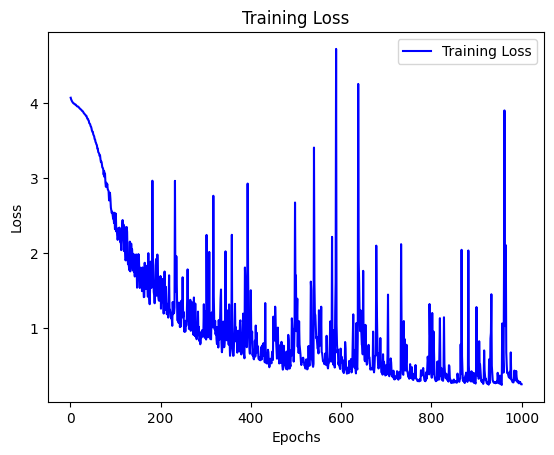

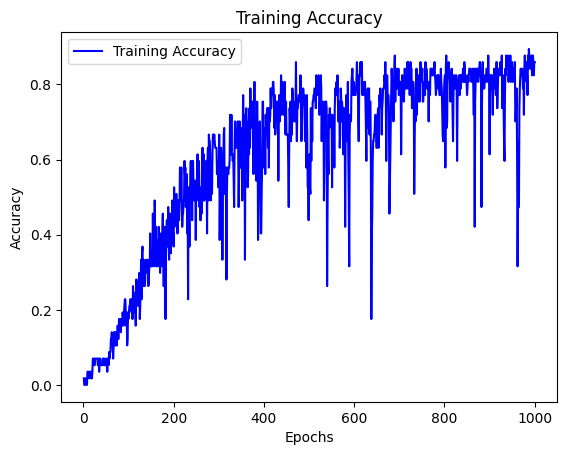

In [26]:
import matplotlib.pyplot as plt

history = history_model

# Menyimpan loss dan accuracy dari setiap epoch dalam variabel
loss = history.history['loss']
accuracy = history.history['accuracy']

# Mengatur sumbu x sebagai jumlah epoch
epochs = range(1, len(loss) + 1)

# Plot loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

In [28]:
y_pred = model.predict(np.array([[4,1,10]]))
print(np.argmax(y_pred))

1/1 [==============================] - 0s 84ms/step
23
